# Exploration of Vehicle data set


The objective of this exploration is to showcase the skills needed to clean and analyze a basic data set.

The database is from crawled information of German eBay [db](https://www.kaggle.com/datasets/sijovm/used-cars-data-from-ebay-kleinanzeigen). Car sellers have posted the information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the database using latin encoding
autos = pd.read_csv('autos.csv', encoding='Latin-1') 
autos.shape
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Exploratory analysis


Some columns have object types, but it would be better if they had number types. For example, for the column 'price' if the dollar sign were to be removed, quantitative analysis could be made using this information. The same for 'odometer'.

In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


The database is from a German-speaking country, and the column names, while they use English words, are not as readable in English. We will change the names of the columns to make it easier to work with this database.

In [5]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Data Wrangling

### Columns that need data wrangling

We have observed that certain columns containing numeric data, such as 'price' and 'odometer', are interpreted as text in the dataframe. Several columns contain limited information, such as 'seller', where all but one one data point says "public"; the same applies to 'offer_type'. The 'num_photos' column contains solely zeros, rendering it devoid of any informative value.

In [6]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


The next action is to correct the columns designated for numeric data. Subsequently, eliminate outlier data points and columns that do not contribute valuable information. 

Initially, we will eliminate the columns containing minimal information, followed by correcting the price and odometer columns.

### Removing unwanted columns

As previously stated, certain columns, such as num_photos, contain just zeros. The seller column has only two commercial sellers, while the remainder are private, resulting in limited information. The identical situation occurs with the offer_type column. Consequently, we shall remove these columns.

In [6]:
# Remove the columns without relevant information
autos = autos.drop(["num_photos", "seller", "offer_type"], axis=1) 

### Using regular expressions  to convert text columns to numbers

The price and odometer columns should have qualitative information; however, this data is now kept as text due to the presence of the '$' symbol and the thousands separator ','. We will eliminate these symbols to facilitate the conversion of this column from a text type (object) to a numeric type (int32). 

In [7]:
# delete the non number characters
autos['price'] = autos['price'].str.replace('$','')
autos['price'] = autos['price'].str.replace(',','')
autos['odometer'] = autos['odometer'].str.replace('km','')
autos['odometer'] = autos['odometer'].str.replace(',','')

# Convert the column from text to integer
autos['price'] = autos['price'].astype(int)
autos['odometer'] = autos['odometer'].astype(int)
autos.rename(columns={'odometer' : 'odometer_km'}, inplace=True)

In [8]:
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


In [9]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        50000 non-null  object
 1   name                50000 non-null  object
 2   price               50000 non-null  int32 
 3   ab_test             50000 non-null  object
 4   vehicle_type        44905 non-null  object
 5   registration_year   50000 non-null  int64 
 6   gearbox             47320 non-null  object
 7   power_ps            50000 non-null  int64 
 8   model               47242 non-null  object
 9   odometer_km         50000 non-null  int32 
 10  registration_month  50000 non-null  int64 
 11  fuel_type           45518 non-null  object
 12  brand               50000 non-null  object
 13  unrepaired_damage   40171 non-null  object
 14  ad_created          50000 non-null  object
 15  postal_code         50000 non-null  int64 
 16  last_seen           50

### Removing inconsistent data points


####  Analyzing price information

The price column contains information that is illogical. Some autos are priced excessively low or high to reflect an actual valuation. 

In [11]:
# show the frecuency of the lowest prices
autos['price'].value_counts().sort_index(ascending=True).head(30)

price
0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
40       6
45       4
47       1
49       4
50      49
55       2
59       1
60       9
65       5
66       1
Name: count, dtype: int64

Clearly, vehicles priced at zero are erroneous entries.  We will use a histogram to identify any discontinuity and find a suitable lowest price.

<Axes: >

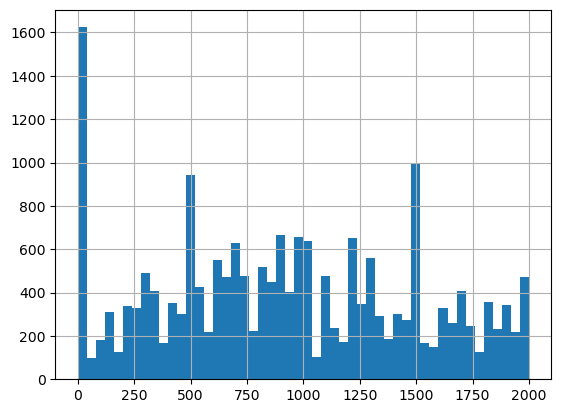

In [ ]:
autos[autos['price'] < 2000]['price'].hist(bins = 50)

To conclude. There appear to be substantial entries with a price of zero, which is evidently an error. However, the histogram does not provide useful information for determining which advertisements include genuine content. Consequently, the optimal approach is to conduct a study of fair prices. Upon reviewing reasonable car pricing based on the data collected in Germany, it is established that the minimum threshold will be 500.

We will conduct a comparable analysis for the highest pricing. 

In [13]:
# show the frecuency of the highest prices
autos['price'].value_counts().sort_index(ascending=False).head(30)

price
99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
194000      1
190000      1
180000      1
175000      1
169999      1
169000      1
163991      1
163500      1
155000      1
151990      1
Name: count, dtype: int64

Prices above 350 000 are evidently numerical sequences found on a keyboard, rather than authentic data, such as the price 12345678. 

We will eliminate the values that are likely erroneous. 

In [14]:
# Drop the numbers that make no sense
autos = autos[autos['price'].between(500, 350001)]

#### Analysis of date crawled information

We will retrieve information from the date columns. Transform them into dates and do an analysis.

In [ ]:
# Show only the day information for the older dates
autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=False).head()

date_crawled
2016-04-07    0.001353
2016-04-06    0.003171
2016-04-05    0.013172
2016-04-04    0.036610
2016-04-03    0.038827
Name: proportion, dtype: float64

In [ ]:
# Show only the day information for the most recent dates
autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=False).tail()

date_crawled
2016-03-09    0.032907
2016-03-08    0.033173
2016-03-07    0.036189
2016-03-06    0.014125
2016-03-05    0.025567
Name: proportion, dtype: float64

The data distribution indicates that it was gathered daily during a two-month period in 2016, and appears to be evenly distributed, save from a few outliers (e.g., 2016-04-07). Consequently, there is no need to alter this column.

#### Analysis of registration year information

We will extract some information from the registration year column do to an exploratory analysis. 

In [19]:
autos['registration_year'].info()

<class 'pandas.core.series.Series'>
Index: 45097 entries, 0 to 49999
Series name: registration_year
Non-Null Count  Dtype
--------------  -----
45097 non-null  int64
dtypes: int64(1)
memory usage: 704.6 KB


In [20]:
autos['registration_year'].describe()

count    45097.000000
mean      2005.064173
std         89.652017
min       1000.000000
25%       2000.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

(0.0, 2000.0)

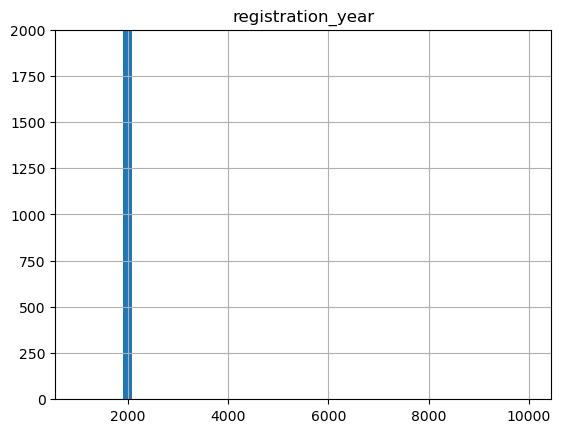

In [21]:
autos.hist(column='registration_year', bins=50)
plt.ylim(0,2000)

Our preliminary assessment reveals that certain dates are illogical. Certain registration years precede the mass manufacture of automobiles (Henry Ford's inaugural production line commenced in 1910).  We can also see that the data was collected in 2016; thus, any registration year subsequent to that is erroneous. Both are unfeasible. We will eliminate these outliers. 

In [ ]:
# Remove the outliers
autos = autos[autos['registration_year'].between(1910,2016)]

## Analyzing price

The primary goal of this project is to clean the database. 

But to finish up, we will show some basic information from this database, in this case to see which parameters have a higher influence on the price of the vehicles and show this information.

### Selecting the most reported brands


In [ ]:
# Extract the unique values for this column
brands = autos['brand'].unique

print(brands)

bran = autos['brand'].value_counts(normalize=True)
suma = []
suma.append(bran[0])


for i in range(1,bran.size):
    suma.append(suma[i-1]+bran[i])

print(suma)


<bound method Series.unique of 0           peugeot
1               bmw
2        volkswagen
3             smart
4              ford
            ...    
49995          audi
49996          opel
49997          fiat
49998          audi
49999          opel
Name: brand, Length: 43323, dtype: object>
[0.21189668305519008, 0.3269164185305727, 0.4291715716824781, 0.5295108833644946, 0.6200170809962375, 0.6851787733998107, 0.7290815502158207, 0.7584423978025528, 0.781963391270226, 0.7998522724649724, 0.8170025159845808, 0.8321215058975601, 0.847125083673799, 0.862128661450038, 0.8762781894143987, 0.8896890797036215, 0.8998453477367679, 0.9095399672229532, 0.9189114327262655, 0.9282828982295779, 0.9360847586732222, 0.9438173718348223, 0.9511575837315054, 0.9577822403803986, 0.9641991551831592, 0.9702236687210029, 0.9761327701221062, 0.9797336287884035, 0.9825727673522149, 0.9850195046511092, 0.9872815825312191, 0.9894513307019367, 0.9914364194538698, 0.9930983542229301, 0.9947141241372943, 0.99605

C:\Users\gone6\AppData\Local\Temp\ipykernel_15908\943687143.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  suma.append(bran[0])
C:\Users\gone6\AppData\Local\Temp\ipykernel_15908\943687143.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  suma.append(suma[i-1]+bran[i])


In [24]:
print(bran[2])

0.10225515315190545


C:\Users\gone6\AppData\Local\Temp\ipykernel_15908\1433456299.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(bran[2])


There are too many unique values. So we will aggregate only up to 90% of the data, which is up to the 16th position.

In [25]:
brand_counts = autos["brand"].value_counts(normalize=True)
common_brands = brand_counts[brand_counts > .05].index
print(common_brands)

Index(['volkswagen', 'bmw', 'mercedes_benz', 'opel', 'audi', 'ford'], dtype='object', name='brand')


In [26]:
brand_mean_prices = {}

for brand in common_brands:
    brand_only = autos[autos["brand"] == brand]
    mean_price = brand_only["price"].mean()
    brand_mean_prices[brand] = int(mean_price)

brand_mean_prices

{'volkswagen': 5783,
 'bmw': 8582,
 'mercedes_benz': 8766,
 'opel': 3394,
 'audi': 9613,
 'ford': 4291}

In [27]:
# Show the cleaned database
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


In [28]:
autos.describe(include= 'all')

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
count,43323,43323,43323.000000,43323,41420,43323.000000,41719,43323.000000,41505,43323.000000,43323.000000,40793,43323,36556,43323,43323.000000,43323
unique,41989,33002,NaN,2,8,NaN,2,NaN,243,NaN,NaN,7,40,2,74,NaN,34695
top,2016-03-19 17:36:18,Volkswagen_Golf_1.4,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,2016-04-07 06:17:27
freq,3,75,NaN,22357,12069,NaN,32058,NaN,3437,NaN,NaN,26142,9180,32992,1699,NaN,8
mean,NaN,NaN,6419.810816,NaN,NaN,2003.227270,NaN,122.380883,NaN,125074.556240,5.955820,NaN,NaN,NaN,NaN,51433.821711,NaN
std,NaN,NaN,9383.219808,NaN,NaN,7.075229,NaN,189.515262,NaN,39701.929794,3.614016,NaN,NaN,NaN,NaN,25706.643499,NaN
min,NaN,NaN,500.000000,NaN,NaN,1910.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN
25%,NaN,NaN,1500.000000,NaN,NaN,1999.000000,NaN,75.000000,NaN,100000.000000,3.000000,NaN,NaN,NaN,NaN,31061.000000,NaN
50%,NaN,NaN,3500.000000,NaN,NaN,2004.000000,NaN,113.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,50389.000000,NaN
75%,NaN,NaN,7999.000000,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,72297.000000,NaN


### Parameters with the highest influence on the price

To visually display the price-influencing parameters, we must first determine which factors have the greatest impact, to prevent a cluttered final graph. The parameters that show the highest influence on a literature review are registration year, odometer km, and whether the car has repaired or unrepaired damage.

### Show the influence of the selected parameters


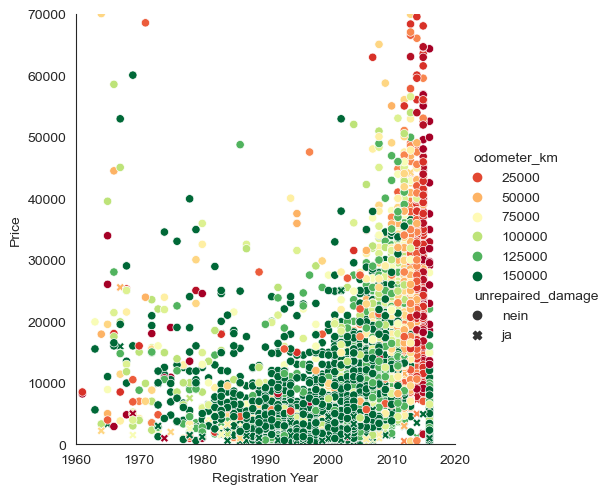

In [30]:
sns.set_style("white")
sns.relplot(data=autos[autos['brand'].isin(common_brands)], x='registration_year', y='price',hue='odometer_km', style='unrepaired_damage', palette='RdYlGn')
plt.xlabel('Registration Year')
plt.ylabel('Price')
plt.axis([1960, 2020, 0, 70000])
plt.show()


As we can see, the selected parameters do not clearly influence the offered price, partly due to the complex nature of these parameters. However, certain trends emerge; it's evident that the registration year, followed by the odometer km, has the highest influence. The influence of repaired versus unrepaired cars primarily relates to the ceiling of the asking price; most cars with unrepaired damage sell for less than 5000, with a few exceptions. 